In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from matplotlib.colors import ListedColormap
import os
from IPython.display import clear_output
import os
import pandas as pd
from PIL import Image


import imutils
from shapely.geometry import Polygon
from matplotlib.patches import Polygon as Poly

### Usage of this Code

To obtain the same results as in the paper, it is necessary to have all the test images in the `images` and `labels` folders. In this example, only three images were used.

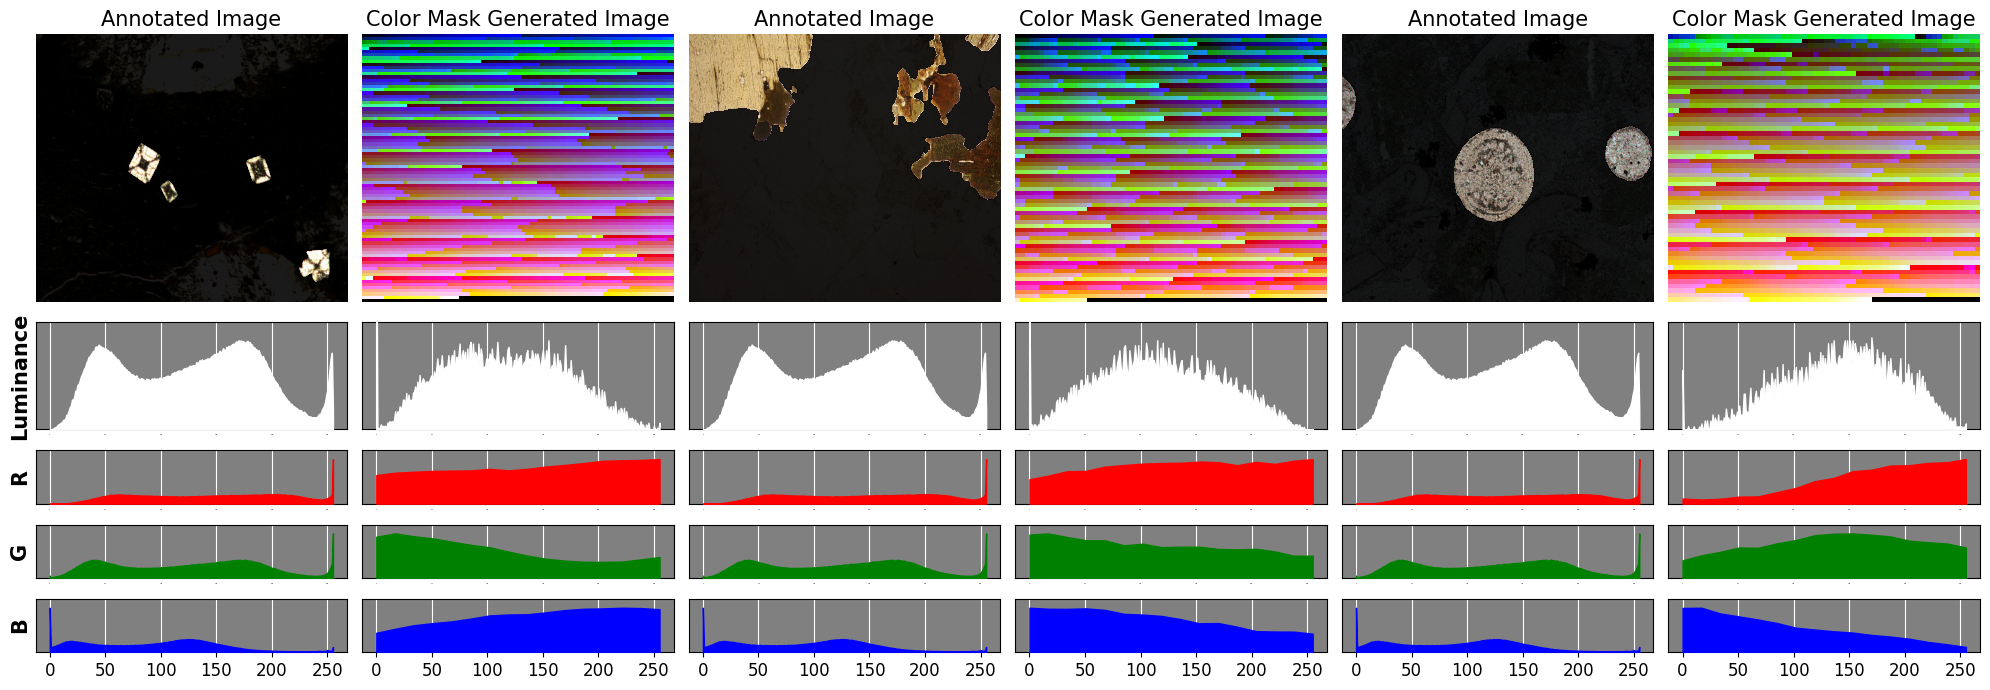

In [3]:
# # 1. Read the RGN combinations that achieve Recall and Precision thresholds

dfa = read_colors('Pixel_PR/Andalusite/', 0.8)
dfb = read_colors('Pixel_PR/Biotite/', 0.8)
dfo = read_colors('Pixel_PR/Ooid/', 0.8)




fig, axes = plt.subplots(nrows=5, ncols=6, gridspec_kw={'height_ratios':[5,2,1,1,1]}, figsize=(20, 7))



####################################################################################################


colors = [(0, 0, 0, 1), (0, 0, 0, 0)]  # Black for 0, Transparent for 1
custom_cmap = ListedColormap(colors)


image_path = "images/009-_jpg.rf.1cc0aaf7e984a5c65cbc0e4f1d1601c7.jpg"
yolo_file = "labels/009-_jpg.rf.1cc0aaf7e984a5c65cbc0e4f1d1601c7.txt"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a RGB para matplotlib

hist_roi = compute_luminance_histogram(img, yolo_file)

mask = polygonize(img, yolo_file)

axes[0][0].imshow(img, aspect="auto")
axes[0][0].imshow(mask, cmap=custom_cmap, alpha=0.9, aspect="auto")



image_folder = "images/"   # Replace
annotation_folder = "labels/"   # Replace

# Obtain histograms by using annotations
total_hist_gray, total_hist_r, total_hist_g, total_hist_b = process_images_and_annotations(image_folder, annotation_folder)

total_hist_gray = total_hist_gray/np.max(total_hist_gray)
total_hist_r = total_hist_r / np.max(total_hist_r)
total_hist_g = total_hist_g / np.max(total_hist_g)
total_hist_b = total_hist_b / np.max(total_hist_b)


axes[1][0].fill_between(x = np.linspace(0, 255, len(total_hist_gray)), y1 = total_hist_gray.flatten(), color = 'white', zorder=3)


hist_roi_rgb = [cv2.calcHist([img], [i], mask, [256], [0, 256]) for i in range(3)]
hist_roi_rgb = [h / h.max() for h in hist_roi_rgb] 

axes[2][0].fill_between(x = np.linspace(0, 255, len(total_hist_r)), y1 = total_hist_r.flatten(), color = 'red', zorder=3)
axes[3][0].fill_between(x = np.linspace(0, 255, len(total_hist_g)), y1 = total_hist_g.flatten(), color = 'green', zorder=3)
axes[4][0].fill_between(x = np.linspace(0, 255, len(total_hist_b)), y1 = total_hist_b.flatten(), color = 'blue', zorder=3)


image_path = "images/K7_jpg.rf.103aaf3789e28e1924d28921a7a1101c.jpg"
yolo_file = "labels/K7_jpg.rf.103aaf3789e28e1924d28921a7a1101c.txt"

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a RGB para matplotlib

hist_roi = compute_luminance_histogram(img, yolo_file)

mask = polygonize(img, yolo_file)

axes[0][2].imshow(img, aspect="auto")
axes[0][2].imshow(mask, cmap=custom_cmap, alpha=0.9, aspect="auto")

image_folder = "images/"   # Replace
annotation_folder = "labels/"   # Replace

total_hist_gray, total_hist_r, total_hist_g, total_hist_b = process_images_and_annotations(image_folder, annotation_folder)

total_hist_gray = total_hist_gray/np.max(total_hist_gray)
total_hist_r = total_hist_r / np.max(total_hist_r)
total_hist_g = total_hist_g / np.max(total_hist_g)
total_hist_b = total_hist_b / np.max(total_hist_b)


axes[1][2].fill_between(x = np.linspace(0, 255, len(total_hist_gray)), y1 = total_hist_gray.flatten(), color = 'white', zorder=3)


hist_roi_rgb = [cv2.calcHist([img], [i], mask, [256], [0, 256]) for i in range(3)]
hist_roi_rgb = [h / h.max() for h in hist_roi_rgb]


axes[2][2].fill_between(x = np.linspace(0, 255, len(total_hist_r)), y1 = total_hist_r.flatten(), color = 'red', zorder=3)
axes[3][2].fill_between(x = np.linspace(0, 255, len(total_hist_g)), y1 = total_hist_g.flatten(), color = 'green', zorder=3)
axes[4][2].fill_between(x = np.linspace(0, 255, len(total_hist_b)), y1 = total_hist_b.flatten(), color = 'blue', zorder=3)



image_path = "images/037-_jpg.rf.30f30ede9fc5f0e1fbdcdd6c3af6b150.jpg"
yolo_file = "labels/037-_jpg.rf.30f30ede9fc5f0e1fbdcdd6c3af6b150.txt"

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a RGB para matplotlib

hist_roi = compute_luminance_histogram(img, yolo_file)

mask = polygonize(img, yolo_file)

axes[0][4].imshow(img, aspect="auto")
axes[0][4].imshow(mask, cmap=custom_cmap, alpha=0.9, aspect="auto")

image_folder = "images/"   # Replace
annotation_folder = "labels/"   # Replace


total_hist_gray, total_hist_r, total_hist_g, total_hist_b = process_images_and_annotations(image_folder, annotation_folder)

total_hist_gray = total_hist_gray/np.max(total_hist_gray)
total_hist_r = total_hist_r / np.max(total_hist_r)
total_hist_g = total_hist_g / np.max(total_hist_g)
total_hist_b = total_hist_b / np.max(total_hist_b)


axes[1][4].fill_between(x = np.linspace(0, 255, len(total_hist_gray)), y1 = total_hist_gray.flatten(), color = 'white', zorder=3)

hist_roi_rgb = [cv2.calcHist([img], [i], mask, [256], [0, 256]) for i in range(3)]
hist_roi_rgb = [h / h.max() for h in hist_roi_rgb] 

axes[2][4].fill_between(x = np.linspace(0, 255, len(total_hist_r)), y1 = total_hist_r.flatten(), color = 'red', zorder=3)
axes[3][4].fill_between(x = np.linspace(0, 255, len(total_hist_g)), y1 = total_hist_g.flatten(), color = 'green', zorder=3)
axes[4][4].fill_between(x = np.linspace(0, 255, len(total_hist_b)), y1 = total_hist_b.flatten(), color = 'blue', zorder=3)

####################################################################################################



dfa_image = generate_fake_image(read_colors('Pixel_PR/Andalusite/', 0.8))
dfb_image = generate_fake_image(read_colors('Pixel_PR/Biotite/', 0.8))
dfo_image = generate_fake_image(read_colors('Pixel_PR/Ooid/', 0.8))

axes[0][1].imshow(dfa_image.astype('uint8'), aspect="auto")
axes[0][3].imshow(dfb_image.astype('uint8'), aspect="auto")
axes[0][5].imshow(dfo_image.astype('uint8'), aspect="auto")



gray_img = cv2.cvtColor(dfa_image.astype('uint8'), cv2.COLOR_RGB2GRAY)
hist_full = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
hist_full /= np.partition(hist_full.flatten(), -2)[-2]
axes[1][1].fill_between(x = np.linspace(0, 255, len(hist_full)), y1 = hist_full.flatten(), color = 'white', zorder=3)

gray_img = cv2.cvtColor(dfb_image.astype('uint8'), cv2.COLOR_RGB2GRAY)
hist_full = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
hist_full /= np.partition(hist_full.flatten(), -2)[-2]
axes[1][3].fill_between(x = np.linspace(0, 255, len(hist_full)), y1 = hist_full.flatten(), color = 'white', zorder=3)

gray_img = cv2.cvtColor(dfo_image.astype('uint8'), cv2.COLOR_RGB2GRAY)
hist_full = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
hist_full /= np.partition(hist_full.flatten(), -2)[-2]
axes[1][5].fill_between(x = np.linspace(0, 255, len(hist_full)), y1 = hist_full.flatten(), color = 'white', zorder=3)

####################################################################################################




r_freq, r_bins = np.histogram(dfa['R'], bins=256, density=True)
g_freq, g_bins = np.histogram(dfa['G'], bins=256, density=True)
b_freq, b_bins = np.histogram(dfa['B'], bins=256, density=True)

axes[2][1].fill_between(x = np.linspace(0, 255, len(r_freq))[r_freq>0], y1 = (r_freq.flatten()/np.max(r_freq))[r_freq>0], color = 'red', zorder=3)
axes[3][1].fill_between(x = np.linspace(0, 255, len(r_freq))[r_freq>0], y1 = (g_freq.flatten()/np.max(g_freq))[r_freq>0], color = 'green', zorder=3)
axes[4][1].fill_between(x = np.linspace(0, 255, len(r_freq))[r_freq>0], y1 = (b_freq.flatten()/np.max(b_freq))[r_freq>0], color = 'blue', zorder=3)



r_freq, r_bins = np.histogram(dfb['R'], bins=256, density=True)
g_freq, g_bins = np.histogram(dfb['G'], bins=256, density=True)
b_freq, b_bins = np.histogram(dfb['B'], bins=256, density=True)

axes[2][3].fill_between(x = np.linspace(0, 255, len(r_freq))[r_freq>0], y1 = (r_freq.flatten()/np.max(r_freq))[r_freq>0], color = 'red', zorder=3)
axes[3][3].fill_between(x = np.linspace(0, 255, len(r_freq))[r_freq>0], y1 = (g_freq.flatten()/np.max(g_freq))[r_freq>0], color = 'green', zorder=3)
axes[4][3].fill_between(x = np.linspace(0, 255, len(r_freq))[r_freq>0], y1 = (b_freq.flatten()/np.max(b_freq))[r_freq>0], color = 'blue', zorder=3)



r_freq, r_bins = np.histogram(dfo['R'], bins=256, density=True)
g_freq, g_bins = np.histogram(dfo['G'], bins=256, density=True)
b_freq, b_bins = np.histogram(dfo['B'], bins=256, density=True)

axes[2][5].fill_between(x = np.linspace(0, 255, len(r_freq))[r_freq>0], y1 = (r_freq.flatten()/np.max(r_freq))[r_freq>0], color = 'red', zorder=3)
axes[3][5].fill_between(x = np.linspace(0, 255, len(r_freq))[r_freq>0], y1 = (g_freq.flatten()/np.max(g_freq))[r_freq>0], color = 'green', zorder=3)
axes[4][5].fill_between(x = np.linspace(0, 255, len(r_freq))[r_freq>0], y1 = (b_freq.flatten()/np.max(b_freq))[r_freq>0], color = 'blue', zorder=3)




####################################################################################################




####################################################################################################

axes[0][0].axis('off')
axes[0][1].axis('off')
axes[0][2].axis('off')
axes[0][3].axis('off')
axes[0][4].axis('off')
axes[0][5].axis('off')



axes[0][0].set_title('Annotated Image', fontsize=15)
axes[0][1].set_title('Color Mask Generated Image', fontsize=15)

axes[0][2].set_title('Annotated Image', fontsize=15)
axes[0][3].set_title('Color Mask Generated Image', fontsize=15)

axes[0][4].set_title('Annotated Image', fontsize=15)
axes[0][5].set_title('Color Mask Generated Image', fontsize=15)


for i, ax in enumerate(axes):
    for axx in ax:
        
        if(i!=0):
            axx.set_ylim(0,1.2)
            axx.set_facecolor("#808080")
            axx.grid(axis='x', color = 'white', zorder = 1)


        axx.set_yticks([])
        if(i!=4):
            axx.tick_params(which = 'both', size = 0, labelsize = 0)
            # axx.set_xticks([])
        else:
            axx.tick_params(which = 'major', labelsize = 12)

axes[1][0].set_ylabel('Luminance', fontsize=15, weight='bold')
axes[2][0].set_ylabel('R', fontsize=15, weight='bold')
axes[3][0].set_ylabel('G', fontsize=15, weight='bold')
axes[4][0].set_ylabel('B', fontsize=15, weight='bold')



plt.tight_layout()
# plt.savefig('colormas_results.png', dpi =300)

In [2]:
def read_colors(folder_path, threshold):
    # Get all text files in the specified folder
    all_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
    
    # List to store all dataframes
    dfs = []
    
    for file in all_files:
        file_path = os.path.join(folder_path, file)
        try:
            # Read each file
            df = pd.read_csv(file_path)
            dfs.append(df)
        except Exception as e:
            print(f"Error reading {file}: {e}")
    
    # 2. Combine all dataframes into one
    combined_df = pd.concat(dfs, ignore_index=True)
    
    # Calculate F1-score
    combined_df['F1'] = 2 * (combined_df[' Precision'] * combined_df[' Recall']) / (combined_df[' Precision'] + combined_df[' Recall'])

    # 4. Filter by F1-Score >= threshold
    filtered_df = combined_df[combined_df['F1'] >= threshold]
    return filtered_df

def compute_luminance_histogram(img, yolo_file):
    # Read polygons from YOLO annotation file
    with open(yolo_file, 'r') as f:
        polygons = [line.strip().split() for line in f.readlines()]
    
    # Image dimensions
    height, width, _ = img.shape
    
    # Create binary mask
    mask = np.zeros((height, width), dtype=np.uint8)
    
    # Process each polygon from the YOLO file
    for poly in polygons:
        class_id = int(poly[0])  # Class (can be ignored)
        coords = list(map(float, poly[1:]))
        points = np.array([
            [int(coords[i] * width), int(coords[i + 1] * height)]
            for i in range(0, len(coords), 2)
        ], dtype=np.int32)
        
        # Draw the polygon on the mask
        cv2.fillPoly(mask, [points], 255)
    
    # Convert image to grayscale for luminance
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Full image histogram (luminance)
    hist_full = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
    hist_full /= hist_full.max()  # Normalize
    
    # Histogram within the mask (ROI, luminance)
    hist_roi = cv2.calcHist([gray_img], [0], mask, [256], [0, 256])
    hist_roi /= hist_roi.max()  # Normalize

    # Return histogram from region of interest
    return hist_roi

def polygonize(img, yolo_file):
    # Read polygons from YOLO annotation file
    with open(yolo_file, 'r') as f:
        polygons = [line.strip().split() for line in f.readlines()]

    height, width, _ = img.shape
    mask = np.zeros((height, width), dtype=np.uint8)

    for poly in polygons:
        class_id = int(poly[0])  # Class (can be ignored here)
        coords = list(map(float, poly[1:]))
        points = np.array([
            [int(coords[i] * width), int(coords[i + 1] * height)]
            for i in range(0, len(coords), 2)
        ], dtype=np.int32)
        
        # Draw the polygon on the mask
        cv2.fillPoly(mask, [points], 255)
    return mask

def process_images_and_annotations(image_folder, annotation_folder):
    # Initialize accumulated histograms
    total_hist_gray = np.zeros(256)
    total_hist_r = np.zeros(256)
    total_hist_g = np.zeros(256)
    total_hist_b = np.zeros(256)
    
    # Iterate over all images in the folder
    for filename in os.listdir(image_folder):
        if filename.endswith(('.jpg', '.png', '.jpeg')):  # Only process image files
            image_path = os.path.join(image_folder, filename)
            annotation_path = os.path.join(annotation_folder, filename.replace('.jpg', '.txt').replace('.png', '.txt'))
            
            # Read the image
            img = cv2.imread(image_path)
            
            # Check if the annotation file exists
            if os.path.exists(annotation_path):
                with open(annotation_path, 'r') as file:
                    # Read all lines from the annotation file
                    for line in file:
                        # Parse each segmentation annotation
                        parts = line.strip().split()
                        
                        # Ensure the line has the correct number of values
                        if len(parts) < 3:
                            print(f"Warning: Ignoring invalid annotation line in {annotation_path}: {line}")
                            continue
                        
                        # YOLO for segmentation: <class_id> <x1> <y1> <x2> <y2> ... <xn> <yn>
                        # Convert the segmentation coordinates to floats
                        try:
                            polygon_points = [(float(parts[i]), float(parts[i+1])) for i in range(1, len(parts), 2)]
                        except ValueError as e:
                            print(f"Error: Invalid values in annotation line: {line}")
                            continue
                        
                        # Convert normalized coordinates to pixel values based on the image
                        img_height, img_width = img.shape[:2]
                        polygon_points = [(int(x * img_width), int(y * img_height)) for x, y in polygon_points]
                        
                        # Calculate histograms for the area defined by the polygon
                        hist_gray, hist_r, hist_g, hist_b = calculate_histograms(img, polygon_points)
                        
                        # Accumulate the histograms
                        total_hist_gray += hist_gray.flatten()
                        total_hist_r += hist_r.flatten()
                        total_hist_g += hist_g.flatten()
                        total_hist_b += hist_b.flatten()
            else:
                print(f"Warning: No annotation file found for {filename}")
    
    return total_hist_gray, total_hist_r, total_hist_g, total_hist_b

def calculate_histograms(image, polygon_points):
    # Create an empty mask with the same size as the image (completely black)
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    
    # Draw the polygon on the mask (in white)
    cv2.fillPoly(mask, [np.array(polygon_points, dtype=np.int32)], 255)
    
    # Convert the image to RGB color space
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Convert the image to grayscale for luminance
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate the luminance histogram for the area inside the mask
    hist_gray = cv2.calcHist([img_gray], [0], mask, [256], [0, 256])
    
    # Calculate the histograms for the RGB channels inside the mask
    hist_r = cv2.calcHist([img_rgb], [0], mask, [256], [0, 256])  # Red channel
    hist_g = cv2.calcHist([img_rgb], [1], mask, [256], [0, 256])  # Green channel
    hist_b = cv2.calcHist([img_rgb], [2], mask, [256], [0, 256])  # Blue channel
    
    return hist_gray, hist_r, hist_g, hist_b

def generate_fake_image(df):
    # Sort the dataframe by R, G, B columns
    sorted_df = df.sort_values(by=['R', 'G', 'B']).reset_index(drop=True)
    
    # Calculate the number of pixels and the side length of the square
    n_pixels = len(sorted_df)
    side_length = int(np.ceil(np.sqrt(n_pixels)))  # Calculate the side length of the square
    n_pixels_square = side_length ** 2
    
    # Create additional black pixels to complete the square
    black_pixels = np.zeros((n_pixels_square - n_pixels, 3), dtype=int)
    
    # Combine the original pixels with the black ones
    all_pixels = np.vstack([sorted_df[['R', 'G', 'B']].values, black_pixels])
    
    # Reshape to (height, width, 3) for the image
    image_data = all_pixels.reshape((side_length, side_length, 3))
    
    return image_data